In [1]:
import geopandas as gpd
import pandas as pd
import osgeo as osg
import numpy as np
import matplotlib.pyplot as plt
from osgeo import ogr
import os
import pyproj
import datetime

In [2]:
data = pd.read_csv('/Users/amankc/Downloads/terminus.csv')
data_sorted =data.sort_values(by=['mid_date'])
data_reset = data_sorted.reset_index(drop=True)

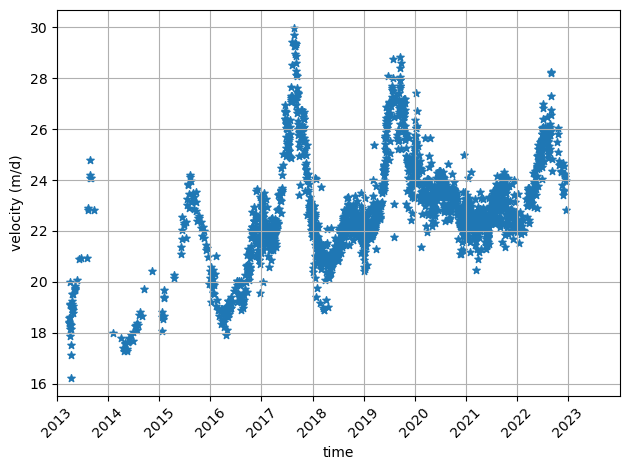

In [3]:
data_latest = data_reset[data_reset['mid_date'] > '2013-01-01']
data_filtered =  data_latest[(data_latest['date_dt [days]'] < 20) & (data_latest['date_dt [days]'] > 1)]
plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2024-01-16'))
# data_filtered['new_date'] = pd.to_datetime(data_filtered['mid_date'])
plt.grid('on')
plt.scatter(data_filtered.loc[:,"mid_date"],data_filtered.loc[:,"v [m/yr]"]/365,s=30,marker='*')
# Increase the number of ticks on the x-axis
date_range = np.arange(np.datetime64('2013-01-01'), np.datetime64('2024-01-01'), step=366)
plt.xticks(date_range, ['2013', '2014', '2015','2016','2017','2018','2019','2020','2021','2022','2023'],rotation=45)
plt.xlabel('time')
plt.ylabel('velocity (m/d)')
plt.tight_layout()
plt.savefig('/Users/amankc/Downloads/velocity.png',dpi=300)
plt.show()

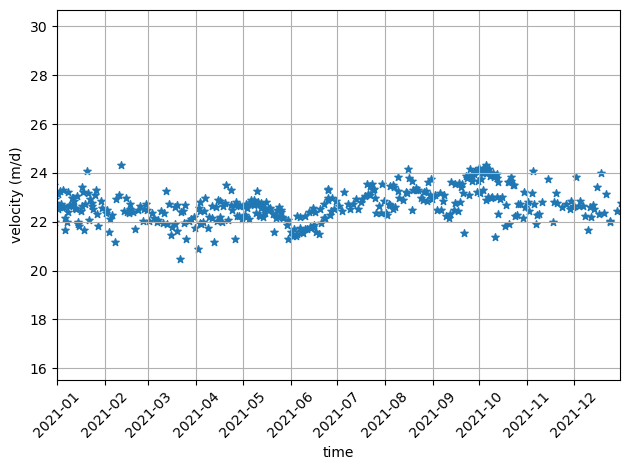

In [4]:
plt.xlim(np.datetime64('2021-01-01'), np.datetime64('2021-12-31'))
# data_filtered['new_date'] = pd.to_datetime(data_filtered['mid_date'])
plt.grid('on')
plt.scatter(data_filtered.loc[:,"mid_date"],data_filtered.loc[:,"v [m/yr]"]/365,s=30,marker='*')
plt.xlabel('time')
plt.ylabel('velocity (m/d)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('/Users/amankc/Downloads/velocity_2021.png',dpi=300)
plt.show()

In [5]:
# data_filtered.to_string()

In [6]:
data_filtered['new_date'] = data_filtered['mid_date'].dt.floor('s')

AttributeError: Can only use .dt accessor with datetimelike values

In [115]:
# plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))

,mid_date,lat,lon,v [m/yr],v_error [m/yr],vx [m/yr],vx_error [m/yr],vy [m/yr],vy_error [m/yr],date_dt [days],mission,satellite,epsg,new_date
415,2013-03-28 01:46:29.224153088,68.55,-32.73,10290.0,566.0,10202.0,569.6,-1344.0,276.6,4,L,8,3413,2013-03-28 01:46:29.224153088
422,2013-04-04 13:42:15.185133056,68.55,-32.73,10681.0,329.0,10630.0,330.7,-1042.0,116.8,9,L,7,3413,2013-04-04 13:42:15.185133056
423,2013-04-04 13:43:43.702104064,68.55,-32.73,10517.0,102.0,10461.0,102.5,-1077.0,65.6,9,L,8,3413,2013-04-04 13:43:43.702104064
435,2013-04-11 13:45:46.592304896,68.55,-32.73,10264.0,322.0,10169.0,324.5,-1398.0,131.7,9,L,7,3413,2013-04-11 13:45:46.592304896
438,2013-04-12 13:39:35.589873920,68.55,-32.73,9982.0,315.0,9882.0,317.5,-1411.0,122.3,8,L,7,3413,2013-04-12 13:39:35.589873920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2022-04-10 01:57:30.220406784,68.55,-32.73,3528.0,115.0,3394.0,112.7,-965.0,137.8,4,S,2A,3413,2022-04-10 01:57:30.220406784
2610,2022-04-25 01:57:35.220421888,68.55,-32.73,8604.0,128.0,8358.0,125.6,-2042.0,157.4,5,S,2B,3413,2022-04-25 01:57:35.220421888
2615,2022-05-22 13:46:34.356550912,68.55,-32.73,7945.0,122.0,7856.0,122.9,-1184.0,91.1,7,L,8,3413,2022-05-22 13:46:34.356550912
2618,2022-05-25 01:57:35.220521728,68.55,-32.73,8353.0,83.0,8287.0,82.6,-1049.0,99.7,5,S,2B,3413,2022-05-25 01:57:35.220521728
